In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from sklearn.decomposition import PCA

In [29]:
trainData = pd.read_csv("train.csv")

In [30]:
# Transform the saleprices to improve correlation numbers and predictive capabilities of the model
trainData["SalePrice"]=np.log10(trainData["SalePrice"])

In [31]:
# Remove the high null value columns (for now)
dropCols = ["Alley","FireplaceQu","Fence","MiscFeature","Id","PoolQC"]
trainData.drop(dropCols,inplace=True,axis=1)

In [32]:
floatCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.float64)[0]]
intCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.int64)[0]]
objCols = trainData.columns[np.where(trainData[trainData.columns].dtypes == object)[0]]

### Float

In [33]:
# GarageYrBlt -> Garage Age
trainData["GarageAge"] = trainData["GarageYrBlt"] - trainData["GarageYrBlt"].min()
trainData.drop("GarageYrBlt",inplace=True,axis=1)
# Sample float cols again
floatCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.float64)[0]]

In [34]:
# LotFrontage ve MasVnrArea -> log transform
trainData["LotFrontage"]=np.log10(trainData["LotFrontage"]+1)
trainData["MasVnrArea"]=np.log10(trainData["MasVnrArea"]+1)

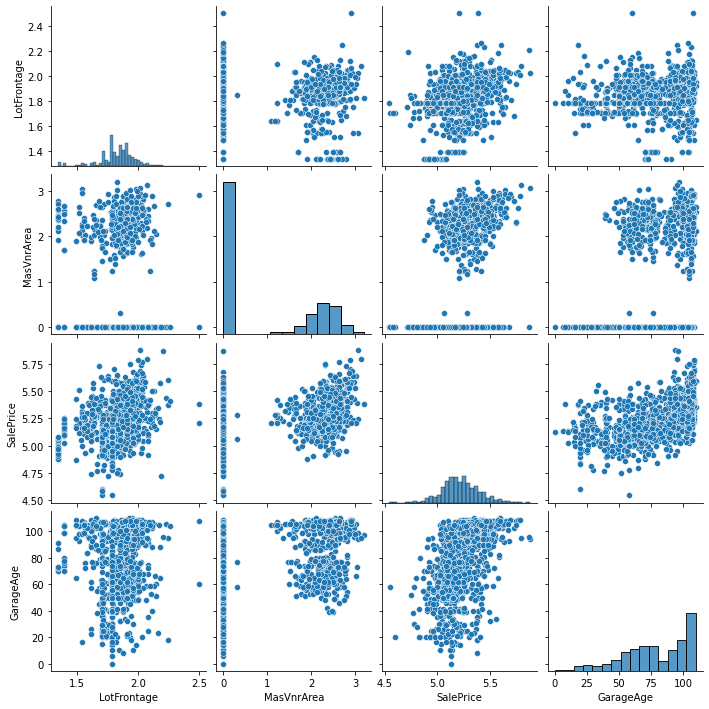

In [27]:
sns.pairplot(trainData[floatCols])

In [35]:
trainData.drop(["LotFrontage","MasVnrArea"],axis=1,inplace=True)

### Int

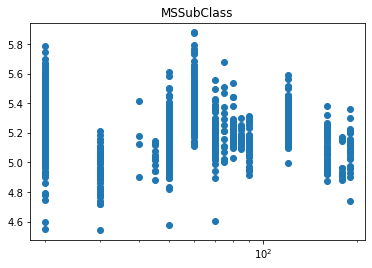

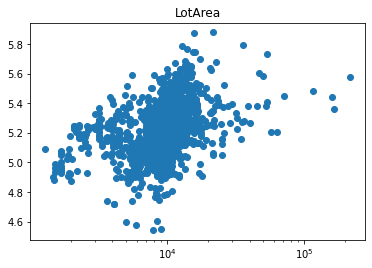

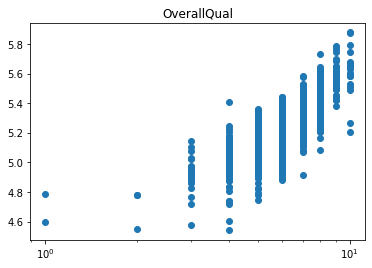

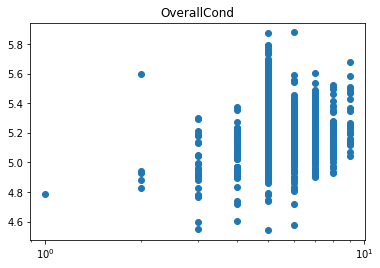

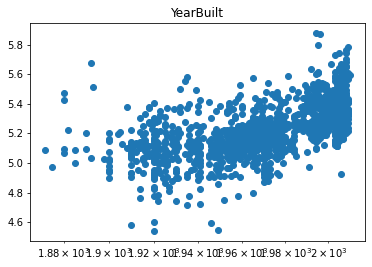

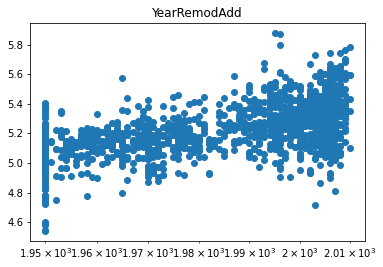

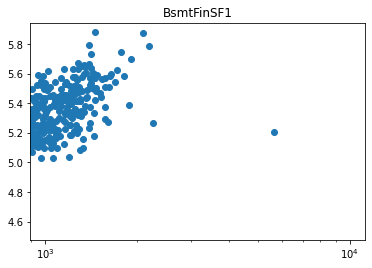

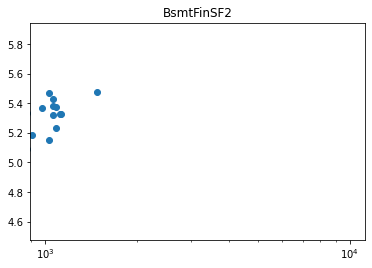

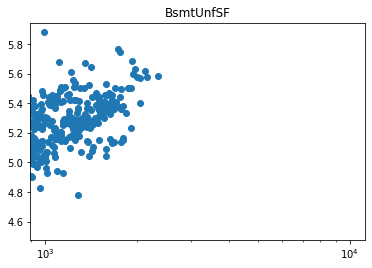

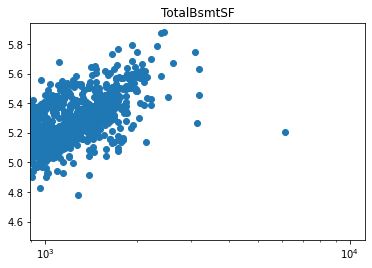

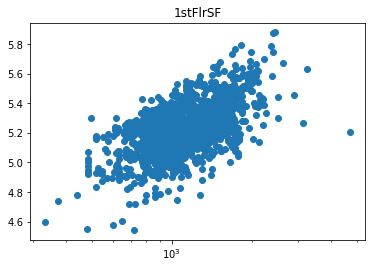

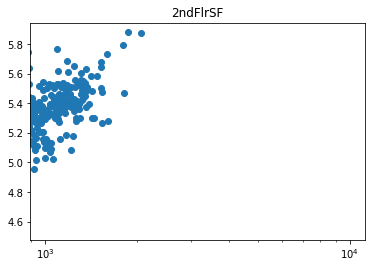

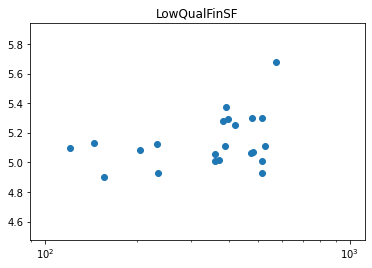

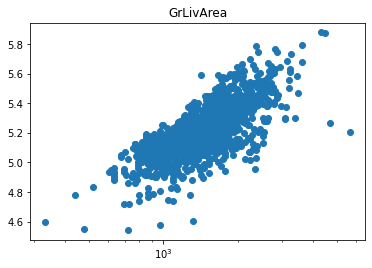

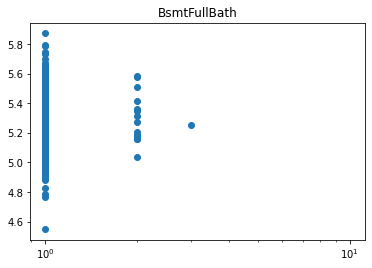

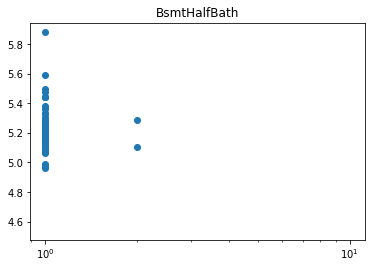

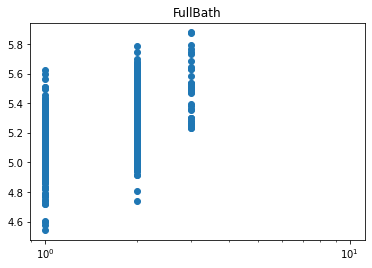

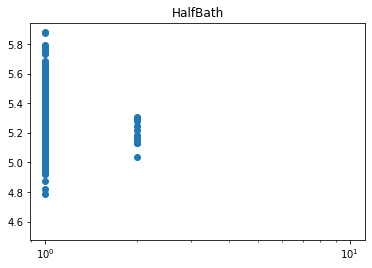

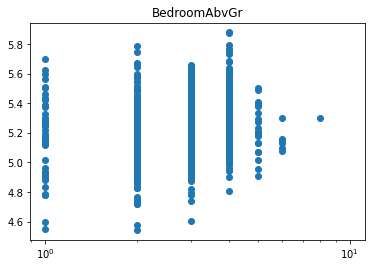

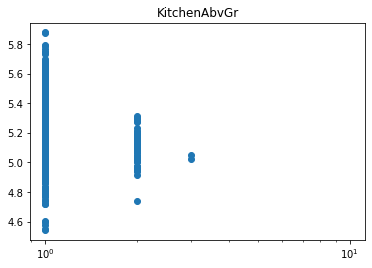

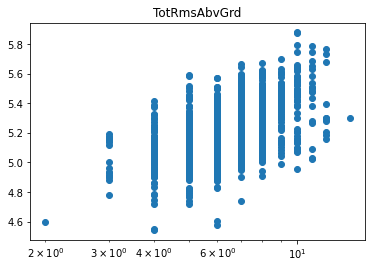

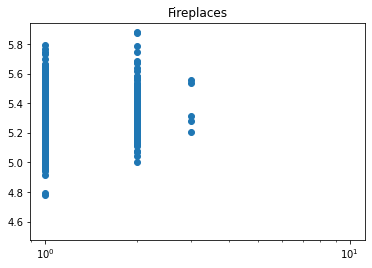

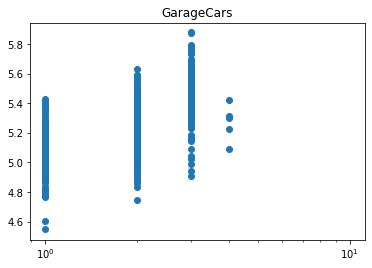

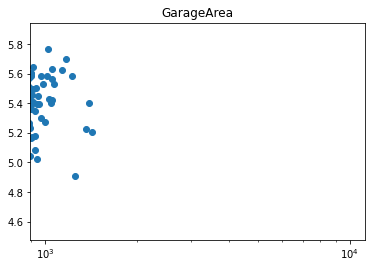

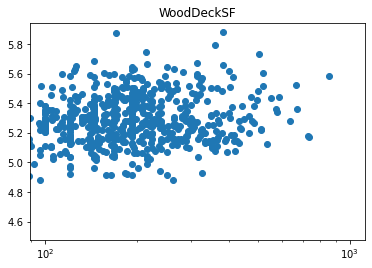

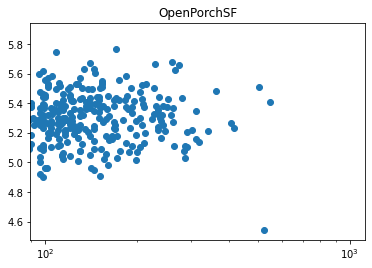

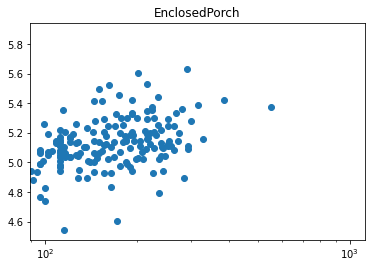

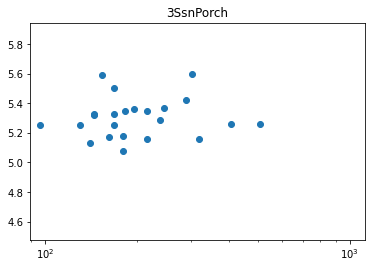

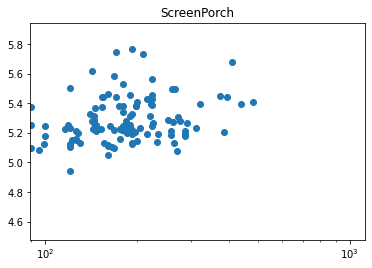

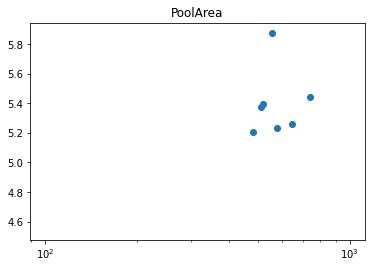

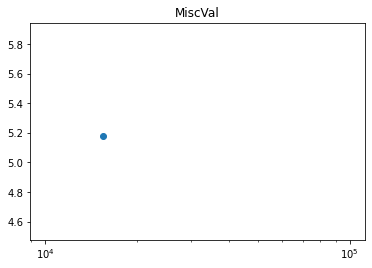

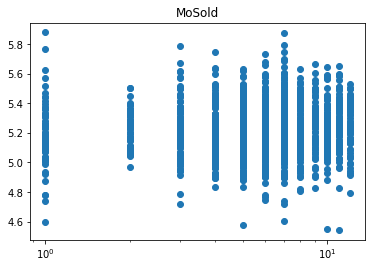

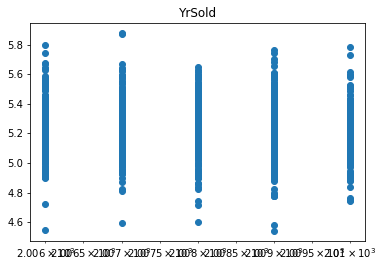

In [42]:
for col in intCols:
    plt.title(col)
    plt.xscale("log")
    plt.scatter(trainData[col],trainData["SalePrice"])
    plt.show()

In [44]:
dropCols = ["YrSold","MoSold","MiscVal","PoolArea","3SsnPorch","Fireplaces",
"BedroomAbvGr","BsmtHalfBath","BsmtFinSF2","LowQualFinSF"]
trainData.drop(dropCols,inplace=True,axis=1)
intCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.int64)[0]]

In [50]:
# TODO : DECIDE TO USE OR NOT LATER
dropCols = ["MSSubClass"]
trainData.drop(dropCols,inplace=True,axis=1)
intCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.int64)[0]]

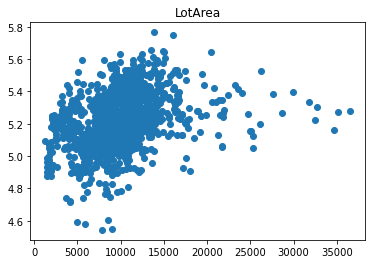

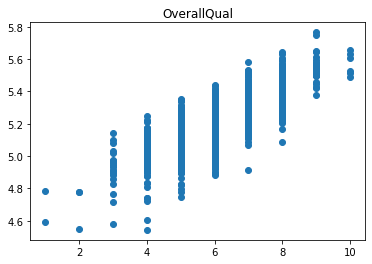

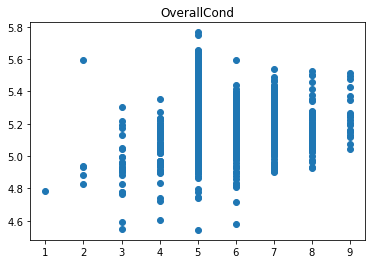

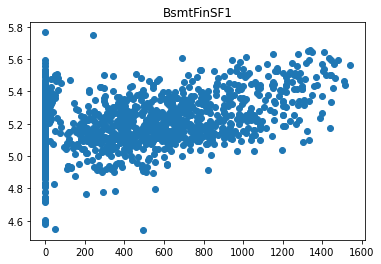

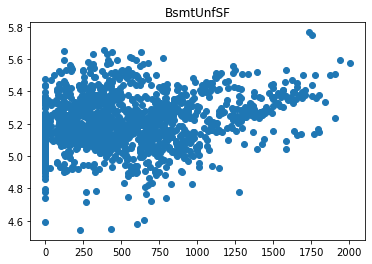

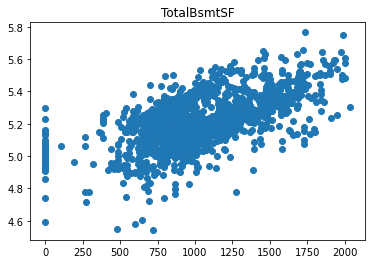

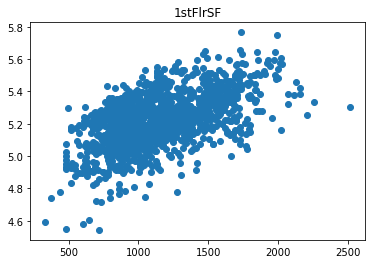

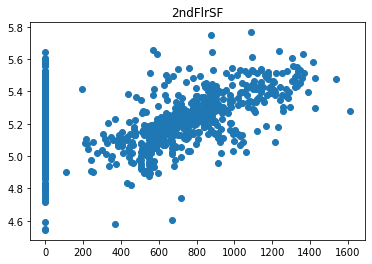

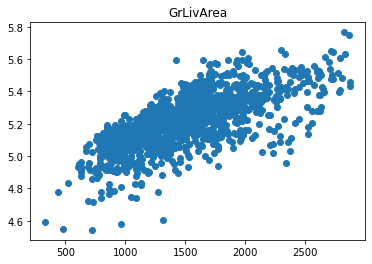

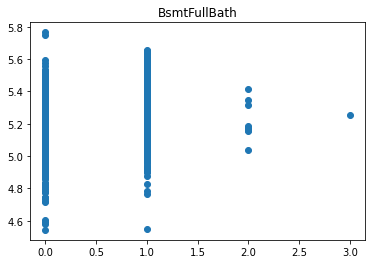

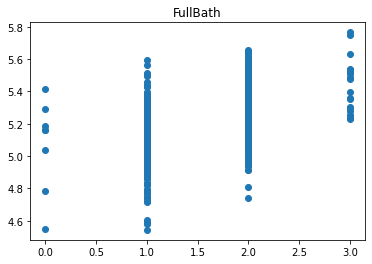

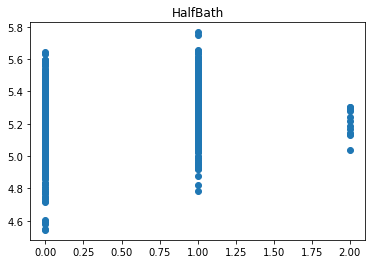

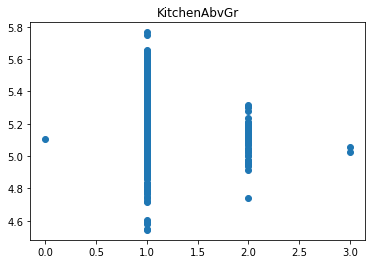

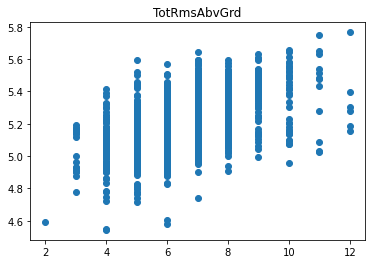

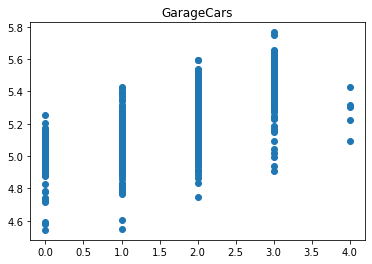

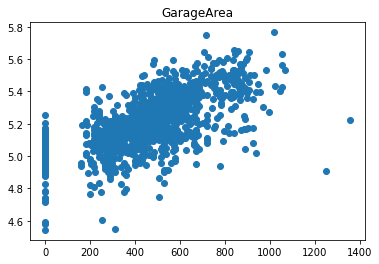

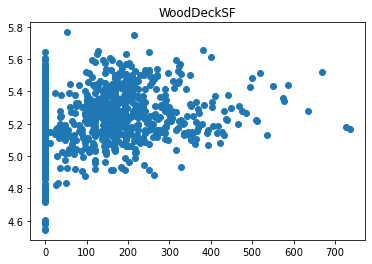

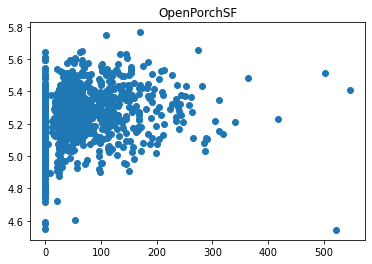

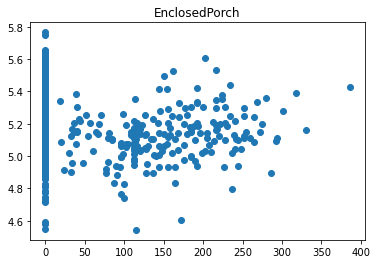

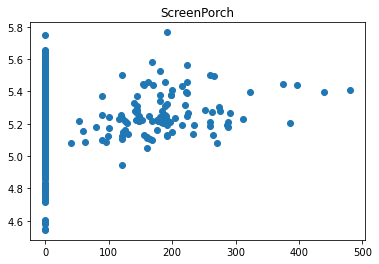

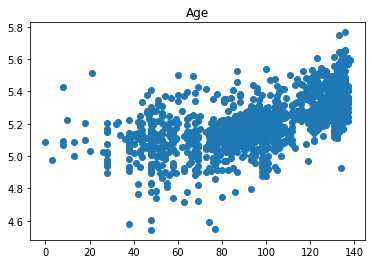

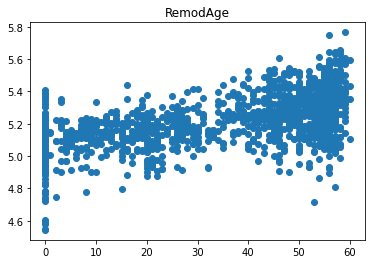

In [58]:
for col in intCols:
    plt.title(col)
    plt.scatter(trainData[col],trainData["SalePrice"])
    plt.show()

In [53]:
deOutlier = ["LotArea","BsmtFinSF1","TotalBsmtSF","GrLivArea"]
for col in deOutlier:
    vals = trainData[col].values
    limit = np.quantile(vals,q=0.99)
    trainData.drop(np.where(vals>limit)[0],axis=0,inplace=True)
    trainData.reset_index(inplace=True,drop=True)
print(trainData.shape)

(1400, 62)


In [55]:
#  YearBuilt -> Age
trainData["Age"] = (trainData["YearBuilt"]-trainData["YearBuilt"].min()).astype(int)
trainData.drop("YearBuilt",inplace=True,axis=1)

#  YearRemodAdd -> RemodAge
trainData["RemodAge"] = (trainData["YearRemodAdd"]-trainData["YearRemodAdd"].min()).astype(int)
trainData.drop("YearRemodAdd",inplace=True,axis=1)

# intCols yeniden çek
intCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.int64)[0]]

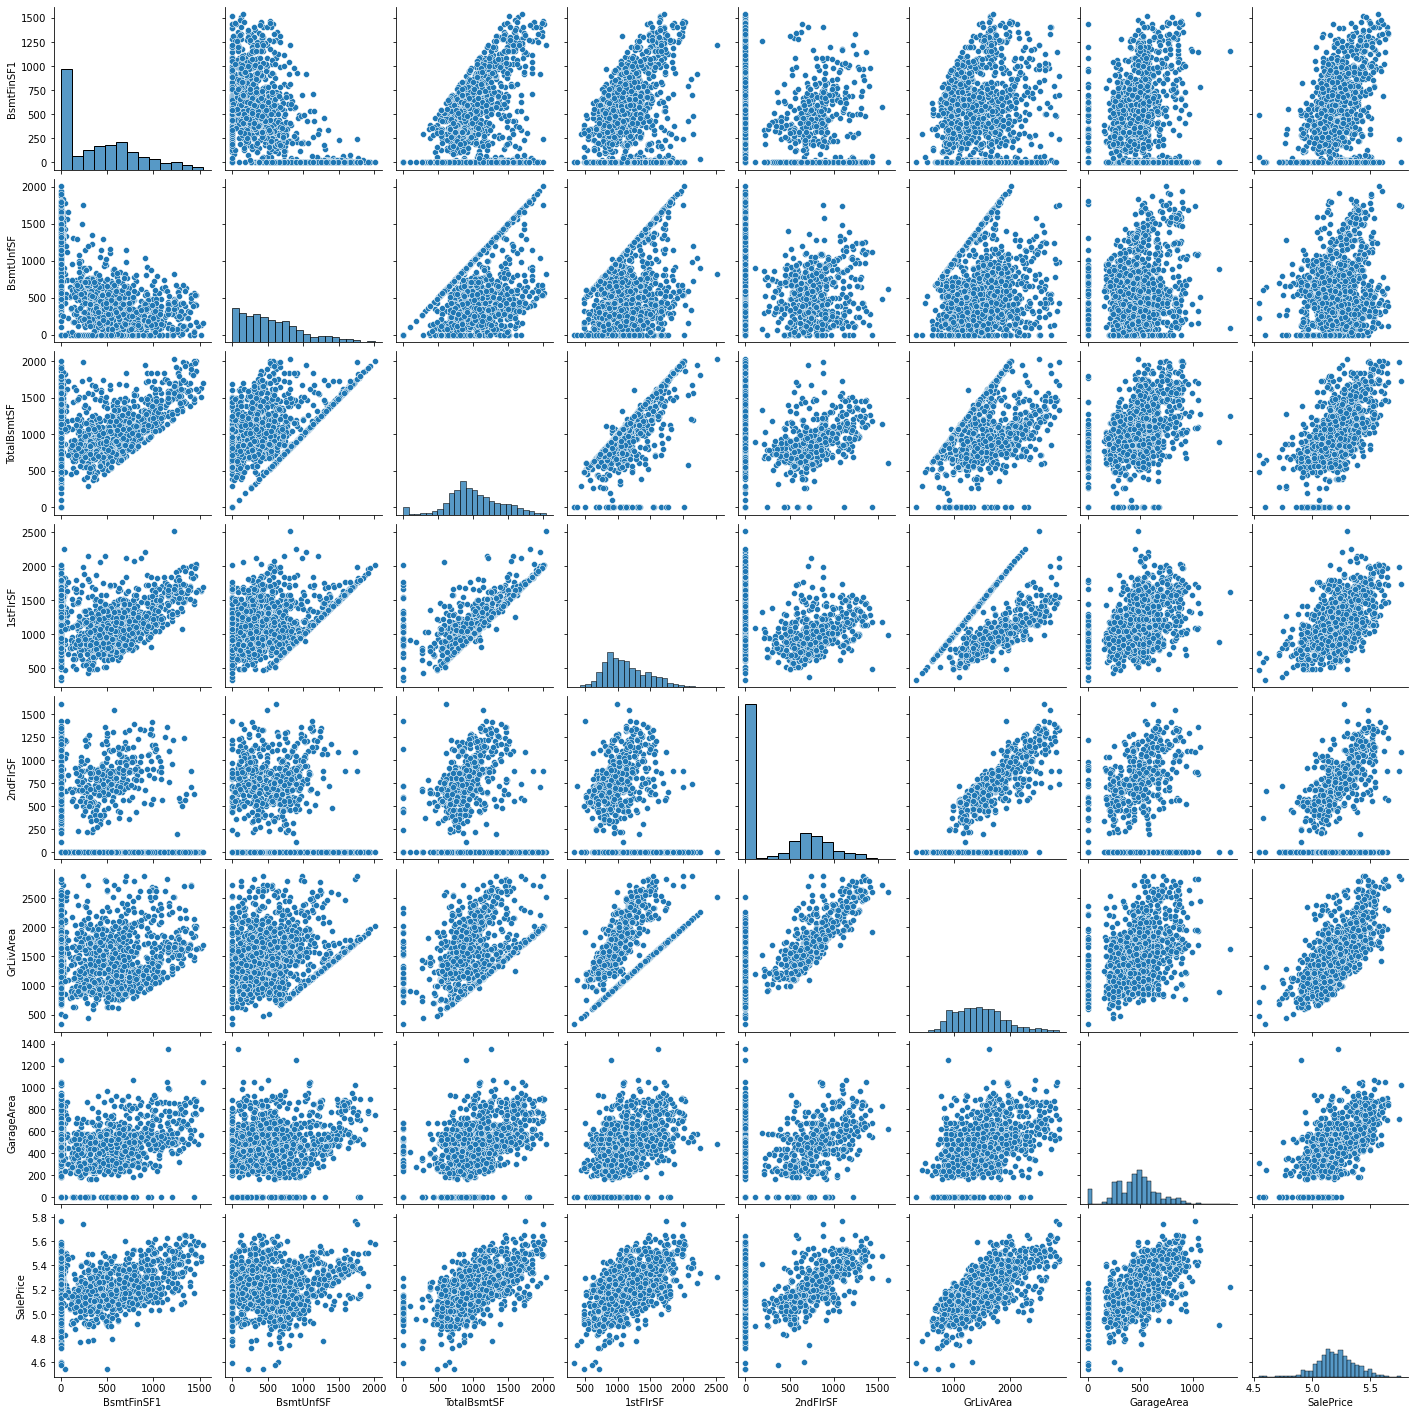

In [63]:
pCols = ["BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageArea","SalePrice"]
sns.pairplot(trainData[pCols])
plt.show()

In [64]:
pCols

['BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea']

In [83]:
pcaCols1 = ["1stFlrSF","2ndFlrSF","GrLivArea","GarageArea"]
pca1=PCA(n_components=len(pcaCols1)).fit(trainData[pcaCols1])

pcaCols2 = ["BsmtFinSF1","BsmtUnfSF","TotalBsmtSF"]
pca2=PCA(n_components=len(pcaCols2)).fit(trainData[pcaCols2])

In [84]:
pca1.explained_variance_ratio_,pca2.explained_variance_ratio_

(array([0.62964797, 0.31583928, 0.05349152, 0.00102122]),
 array([0.55796999, 0.42526528, 0.01676472]))

In [87]:
sum(pca1.explained_variance_ratio_[:2]),sum(pca2.explained_variance_ratio_[:2])

(0.9454872532627265, 0.9832352755315111)